### EDA graphs

In [10]:
#Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [11]:
df = pd.read_csv('final_df.csv')

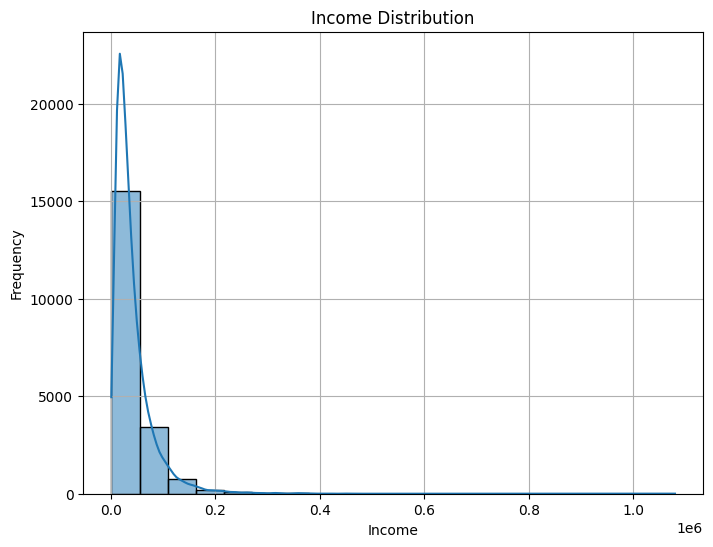

In [12]:
# Income distribution in the data is left-skewed
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

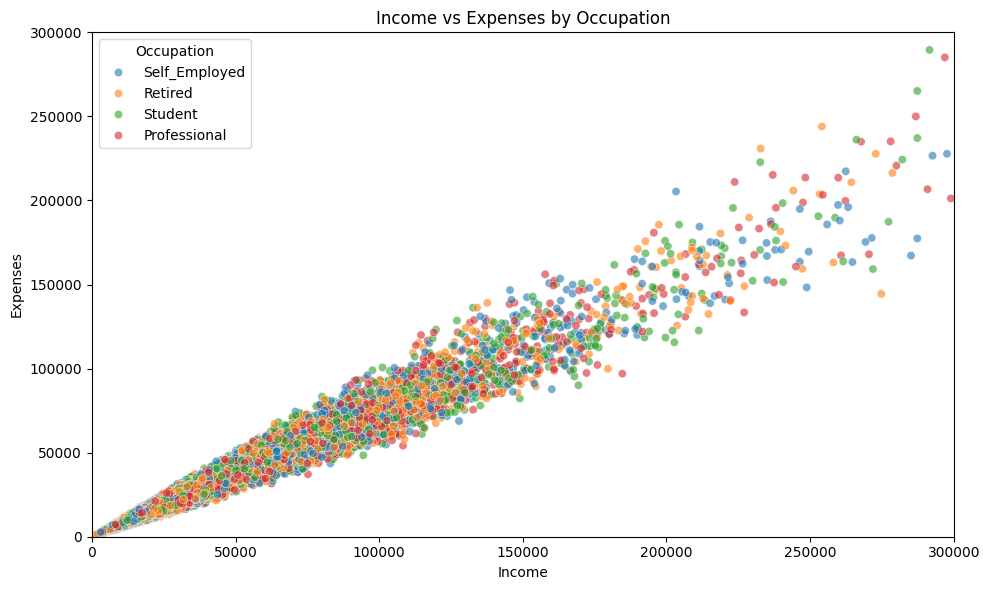

In [13]:
# Scatter plot for Income vs Expenses colored by Occupation
plt.figure(figsize=(10, 6))
plt.xlim(0, 300000)  # Adjust the range based on your data
plt.ylim(0, 300000)  # Adjust the range based on your data
sns.scatterplot(data=df, x='Income', y='Expenses', hue='Occupation', alpha=0.6)
plt.title('Income vs Expenses by Occupation')
plt.tight_layout()
plt.show()

In [14]:
# Label encoding 
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store encoder for inverse transformation if needed
df

Unnamed: 0         Income  Age  Dependents  Occupation  City_Tier  \
0               0   44637.249636   49           0           2          0   
1               1   26858.596592   34           2           1          1   
2               2   50367.605084   35           1           3          2   
3               3  101455.600247   21           0           2          2   
4               4   24875.283548   52           4           0          1   
...           ...            ...  ...         ...         ...        ...   
19995       19995   40913.466178   51           4           2          0   
19996       19996   90295.772638   21           1           3          1   
19997       19997   40604.567373   30           1           0          1   
19998       19998  118157.817240   27           2           0          0   
19999       19999    8209.249769   62           3           0          0   

       Desired_Savings_Percentage  Desired_Savings  Disposable_Income  \
0                       13.890948      6200.537192       11265.627707   
1                        7.160376      1923.176434        9676.818733   
2                       13.997808      7050.360422       13891.450624   
3                       16.455440     16694.965136       31617.953615   
4                        7.533982      1874.099434        6265.700532   
...                           ...              ...                ...   
19995                   12.353542      1163.318310        1163.318310   
19996                   11.754249     10613.589598       30725.175170   
19997                   13.854837      2267.905134        2267.905134   
19998                   17.436659     10603.684814       10603.684814   
19999                    6.468849       531.044006         860.350559   

            Expenses  SavingsRate  ExpenseRatio    NetSavings  
0       33371.621929     0.138909      0.747618   5065.090514  
1       17181.777859     0.071604      0.639712   7753.642299  
2       36476.154459     0.139978      0.724199   6841.090203  
3       69837.646632     0.164554      0.688357  14922.988478  
4       18609.583016     0.075340      0.748115   4391.601098  
...              ...          ...           ...           ...  
19995   39750.147868     0.028434      0.971566      0.000000  
19996   59570.597468     0.117542      0.659727  20111.585573  
19997   38336.662239     0.055853      0.944147      0.000000  
19998  107554.132426     0.089742      0.910258      0.000000  
19999    7348.899210     0.064688      0.895197    329.306553  

[20000 rows x 13 columns]

#### GOOD vs BAD financial standing

Setting the threshold for person to be in good financial standing to have a savings rate of higher than 12% and their NetSavings to be non-negative.

In [15]:
# Define thresholds for classification
df['Financial_Status'] = ((df['SavingsRate'] > 0.12) & (df['NetSavings'] > 0)).astype(int)

# Check the distribution of Financial_Status
print(df['Financial_Status'].value_counts())

Financial_Status
0    15826
1     4174
Name: count, dtype: int64


#### Correlation Heatmap

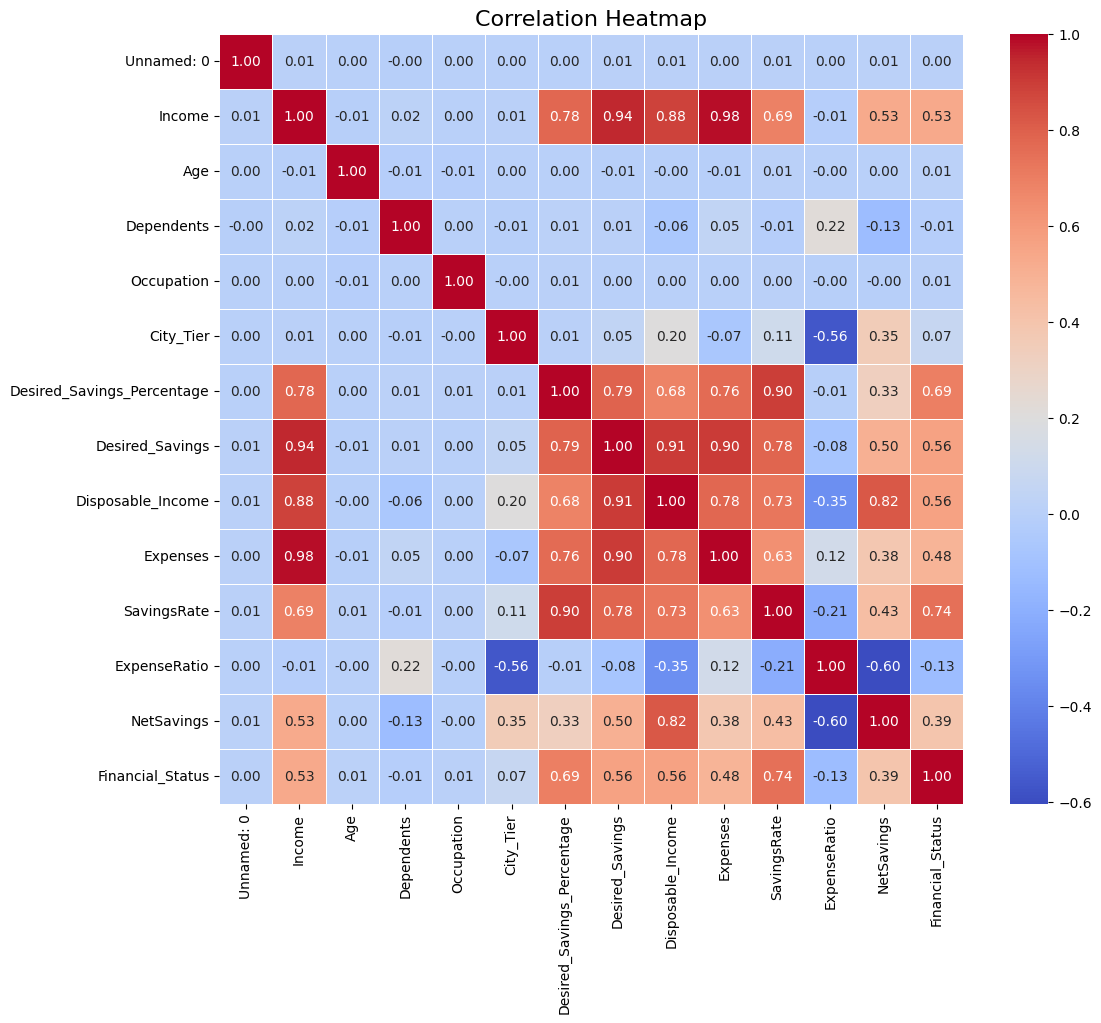

Top correlated features with Financial Status:
Financial_Status              1.000000
SavingsRate                   0.744217
Desired_Savings_Percentage    0.693072
Disposable_Income             0.564020
Desired_Savings               0.563737
Income                        0.531241
Expenses                      0.484962
NetSavings                    0.392865
ExpenseRatio                  0.133681
City_Tier                     0.068752
Age                           0.012611
Dependents                    0.010597
Occupation                    0.005712
Unnamed: 0                    0.004087
Name: Financial_Status, dtype: float64


In [16]:
correlation_matrix = df.corr()

# Plot heatmap for correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Get the absolute correlations of the target variable
target_correlation = correlation_matrix["Financial_Status"].abs().sort_values(ascending=False)
print("Top correlated features with Financial Status:")
print(target_correlation)

In [17]:
df.to_csv('final_data.csv')